# Calculate Genre Of Songs By Modelling

### Import libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from pandas.plotting import scatter_matrix
from sklearn import datasets, svm, tree, preprocessing, metrics

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Import dataset

In [40]:
data = pd.read_csv("../../data/cleanedDataSetWithGenres.csv")

### Explore the dataset

In [41]:
data.head()

,Unnamed: 0,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,1,Despacito (Featuring Daddy Yankee),1,2017-04-07,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Dominican Republic,11681.0,0.660,0.786,2.0,-4.757,0.1700,0.209,0.000000,0.1120,0.8460,177.833,228200.0,Pop
1,4,Binibini,1,2021-04-16,Zack Tabudlo,https://open.spotify.com/track/2X5AFygz5SDYlXa...,Philippines,401678.0,0.642,0.374,5.0,-10.606,0.0320,0.423,0.000002,0.4350,0.0979,129.863,221538.0,Pop
2,5,7 rings,1,2019-03-16,Ariana Grande,https://open.spotify.com/track/6ocbgoVGwYJhOv1...,Indonesia,125837.0,0.778,0.317,1.0,-10.732,0.3340,0.592,0.000000,0.0881,0.3270,140.048,178627.0,Rap
3,6,Shape of You,1,2017-03-08,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Portugal,55132.0,0.825,0.652,1.0,-3.183,0.0802,0.581,0.000000,0.0931,0.9310,95.977,233713.0,R&B
4,9,Someone You Loved,1,2019-03-16,Lewis Capaldi,https://open.spotify.com/track/2TIlqbIneP0ZY1O...,Ireland,63074.0,0.501,0.405,1.0,-5.679,0.0319,0.751,0.000000,0.1050,0.4460,109.891,182161.0,Pop


In [42]:
data.dtypes

Unnamed: 0            int64
title                object
rank                  int64
date                 object
artist               object
url                  object
region               object
streams             float64
danceability        float64
energy              float64
key                 float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
genre                object
dtype: object

In [43]:
# Drop unnamed column with old index.
data.drop('Unnamed: 0', inplace=True, axis=1)

In [54]:
data.isna().sum()

title               0
rank                0
date                0
artist              0
url                 0
region              0
streams             0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

In [52]:
data = data.dropna()

In [55]:
# Show distribution of genres.
data['genre'].value_counts()

Rap          25622
Pop          24031
Rock          3743
R&B           3238
Country        520
Non-Music      212
Name: genre, dtype: int64

<AxesSubplot:>

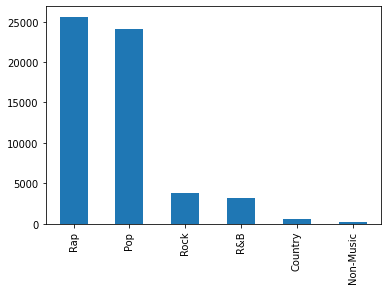

In [56]:
data['genre'].value_counts().plot.bar()

In [57]:
# Show average values of different genres
data.groupby('genre').mean()

,rank,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
genre,,,,,,,,,,,,,
Country,95.019231,212055.023077,0.583544,0.627910,5.326923,-6.726113,0.046474,0.335949,0.002891,0.181667,0.537142,120.929127,208160.923077
Non-Music,102.301887,27814.735849,0.636929,0.622670,5.877358,-7.590509,0.134773,0.361539,0.026572,0.196504,0.535940,123.359623,202248.702830
Pop,83.790687,58515.131164,0.639167,0.637737,5.314178,-6.693467,0.080394,0.282070,0.019803,0.174042,0.513969,120.774922,211737.559028
R&B,80.557134,104515.682829,0.649587,0.581889,5.253860,-7.266507,0.113669,0.310684,0.015652,0.162309,0.466005,117.533882,209227.576899
Rap,71.960347,111040.793810,0.733299,0.647470,5.320584,-7.063168,0.209611,0.232026,0.007154,0.169027,0.494533,122.092469,190726.468387
Rock,97.218274,54360.912103,0.536877,0.711454,5.332087,-6.675606,0.061901,0.173021,0.059505,0.193132,0.475750,124.939532,237187.927865


In [58]:
data.corr()

,rank,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
rank,1.000000,-0.264633,-0.105134,0.002725,0.001356,-0.027425,-0.064123,0.025821,0.046552,0.016840,-0.003279,-0.009565,0.052955
streams,-0.264633,1.000000,0.065880,-0.031795,-0.006406,0.010798,0.090070,-0.018482,-0.026891,0.006667,-0.028057,0.017987,-0.057000
danceability,-0.105134,0.065880,1.000000,0.107217,0.005307,0.110245,0.203953,-0.212279,-0.099183,-0.096646,0.343297,-0.069555,-0.230534
energy,0.002725,-0.031795,0.107217,1.000000,0.027545,0.719369,0.025008,-0.535293,-0.030418,0.157855,0.365835,0.093243,-0.006882
key,0.001356,-0.006406,0.005307,0.027545,1.000000,0.004230,0.018134,0.000383,-0.000203,0.001520,0.038801,0.000863,-0.000581
loudness,-0.027425,0.010798,0.110245,0.719369,0.004230,1.000000,-0.079188,-0.404731,-0.152517,0.083832,0.255669,0.069665,-0.021133
speechiness,-0.064123,0.090070,0.203953,0.025008,0.018134,-0.079188,1.000000,-0.039483,-0.088785,0.033715,0.054078,0.050617,-0.190498
acousticness,0.025821,-0.018482,-0.212279,-0.535293,0.000383,-0.404731,-0.039483,1.000000,0.015339,-0.071857,-0.139532,-0.088699,0.036933
instrumentalness,0.046552,-0.026891,-0.099183,-0.030418,-0.000203,-0.152517,-0.088785,0.015339,1.000000,0.002616,-0.090615,-0.004317,0.073759
liveness,0.016840,0.006667,-0.096646,0.157855,0.001520,0.083832,0.033715,-0.071857,0.002616,1.000000,0.047777,0.010807,-0.009237


rank                    AxesSubplot(0.125,0.71587;0.168478x0.16413)
streams              AxesSubplot(0.327174,0.71587;0.168478x0.16413)
danceability         AxesSubplot(0.529348,0.71587;0.168478x0.16413)
energy               AxesSubplot(0.731522,0.71587;0.168478x0.16413)
key                    AxesSubplot(0.125,0.518913;0.168478x0.16413)
loudness            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
speechiness         AxesSubplot(0.529348,0.518913;0.168478x0.16413)
acousticness        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
instrumentalness       AxesSubplot(0.125,0.321957;0.168478x0.16413)
liveness            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
valence             AxesSubplot(0.529348,0.321957;0.168478x0.16413)
tempo               AxesSubplot(0.731522,0.321957;0.168478x0.16413)
duration_ms               AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

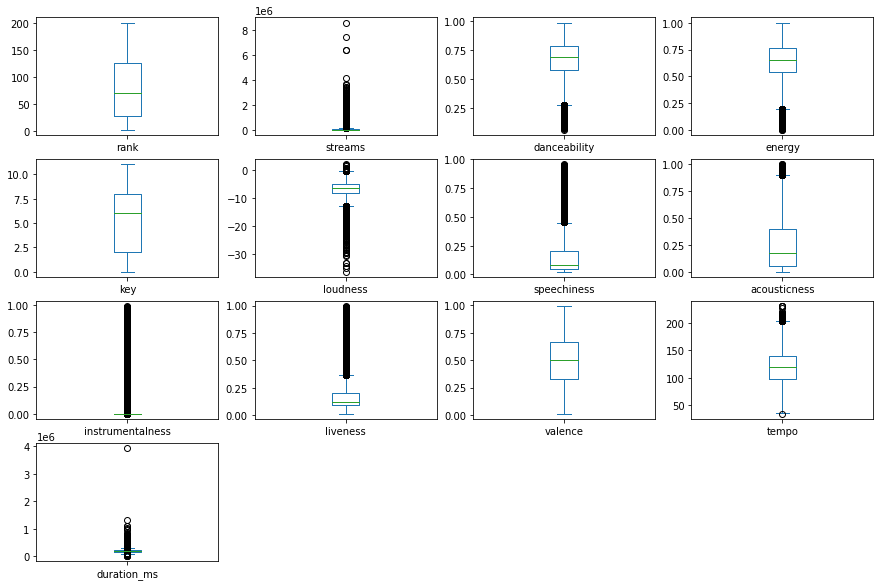

In [59]:
data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(15, 10))

array([[<AxesSubplot:title={'center':'rank'}>,
        <AxesSubplot:title={'center':'streams'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

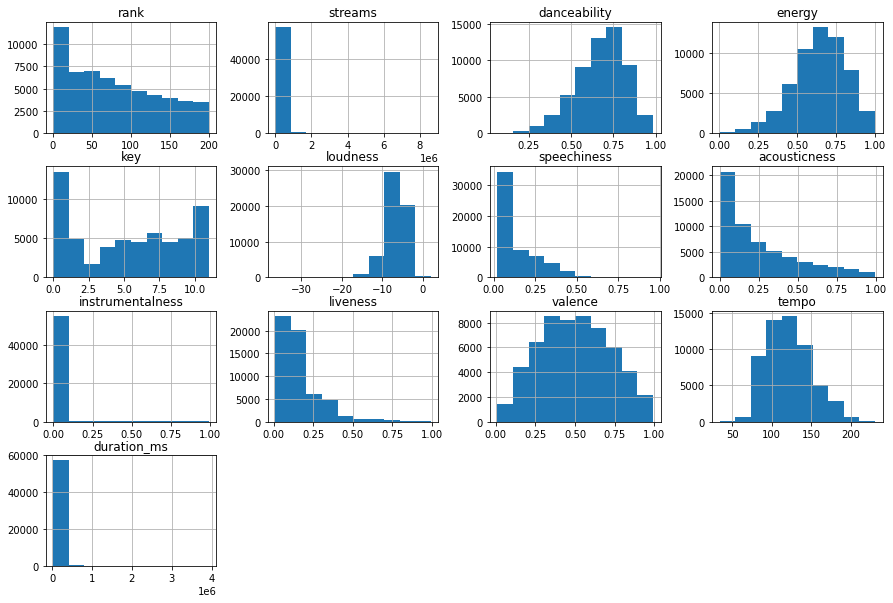

In [60]:
data.hist(figsize=(15,10))

### Training a model

In [61]:
# Drop unmeasurable columns with strings.
data.drop('title', inplace=True, axis=1)
data.drop('date', inplace=True, axis=1)
data.drop('artist', inplace=True, axis=1)
data.drop('url', inplace=True, axis=1)
data.drop('region', inplace=True, axis=1)

In [62]:
# Second round - dropping streams and duration_ms
data.drop('streams', inplace=True, axis=1)
data.drop('duration_ms', inplace=True, axis=1)

In [63]:
# Check that they have been removed properly.
data

,rank,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,1,0.660,0.786,2.0,-4.757,0.1700,0.2090,0.000000,0.1120,0.8460,177.833,Pop
1,1,0.642,0.374,5.0,-10.606,0.0320,0.4230,0.000002,0.4350,0.0979,129.863,Pop
2,1,0.778,0.317,1.0,-10.732,0.3340,0.5920,0.000000,0.0881,0.3270,140.048,Rap
3,1,0.825,0.652,1.0,-3.183,0.0802,0.5810,0.000000,0.0931,0.9310,95.977,R&B
4,1,0.501,0.405,1.0,-5.679,0.0319,0.7510,0.000000,0.1050,0.4460,109.891,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...
57367,200,0.631,0.381,8.0,-8.232,0.0386,0.7680,0.002180,0.2610,0.5460,92.951,Pop
57368,200,0.688,0.685,7.0,-7.699,0.0379,0.5040,0.000000,0.0984,0.8090,143.081,Pop
57369,200,0.553,0.853,0.0,-4.307,0.0367,0.0010,0.011000,0.1150,0.4850,126.056,Rock
57370,200,0.801,0.488,11.0,-12.174,0.1020,0.0282,0.000277,0.1120,0.7330,106.071,Rap


In [64]:
# Convert the dataset into two arrays
array = data.values
# Create two (sub) arrays from it
X = array[:,0:11] # data without class
y = array[:,11]   # just class

In [65]:
# Check that y has the genre values.
y

array(['Pop', 'Pop', 'Rap', ..., 'Rock', 'Rap', 'Pop'], dtype=object)

In [66]:
from sklearn import model_selection

# Split the dataset into two: 
#   80% of it as training data
#   20% as a validation dataset
# Let Python split the set into four, we tell the proportion of splitting
test_set_size = 0.2

# Initial value for randomization
seed = 7

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_set_size, random_state=seed)


## Train different models to find out which one is most precise.

### <span style="color: green">GaussianNB</span>

In [67]:
import time
from sklearn.naive_bayes import GaussianNB

# Time the event.
tic = time.perf_counter()

# Choose a model for fitting the data.
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)

toc = time.perf_counter()
print(f"Completed the fit in {toc - tic:0.6f} seconds")

Completed the fit in 0.089018 seconds


In [68]:
# Check how good the fit of the model is on the train data.
train_accuracy = gaussian_model.score(X_train, y_train)
train_accuracy

0.6314390307678899

In [69]:
# Check how good the fit of the model is on the test data.
test_accuracy = gaussian_model.score(X_test, y_test)
test_accuracy

0.6385741676834582

In [70]:
# Test on the test data, try prediction
gaussian_prediction = gaussian_model.predict(X_test)
gaussian_prediction

array(['Pop', 'Pop', 'Pop', ..., 'Rap', 'Pop', 'Pop'], dtype='<U9')

In [71]:
# Confusion matrix provides an indication of the the errors of prediction
print(confusion_matrix(y_test, gaussian_prediction))

[[   0    1   92    0   20    2]
 [   0    3   21    0   11    1]
 [   8   12 2776    2 1783  174]
 [   0    1  305    0  302   20]
 [   1   30  679   11 4439   45]
 [   1    4  524    0   97  109]]


In [72]:
print(f"Completed the fit in {round((toc-tic)*1000, 6)} milliseconds")
print(f"The fit has a \033[1m\033[93mtrain\033[0m set accuracy of {round(train_accuracy*100, 1)} %")
print(f"The fit has a \033[1m\033[92mtest\033[0m set accuracy of {round(test_accuracy*100, 1)} %")


Completed the fit in 89.0176 milliseconds
The fit has a train set accuracy of 63.1 %
The fit has a test set accuracy of 63.9 %


### <span style="color: green">Logistic Regression</span>

In [73]:
# Time the event.
tic = time.perf_counter()

logistic_regression_model = LogisticRegression(max_iter=10)
logistic_regression_model.fit(X_train, y_train)

toc = time.perf_counter()
print(f"Completed the fit in {toc - tic:0.6f} seconds")

Completed the fit in 0.453020 seconds


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
# Check how good the fit of the model is on the train data.
train_accuracy = logistic_regression_model.score(X_train, y_train)
train_accuracy

0.4715636712281008

In [75]:
# Check how good the fit of the model is on the test data.
test_accuracy = logistic_regression_model.score(X_test, y_test)
test_accuracy

0.47394108419034336

In [76]:
# Test on the test data, try prediction
logistic_regression_prediction = logistic_regression_model.predict(X_test)
logistic_regression_prediction

array(['Pop', 'Rap', 'Pop', ..., 'Rap', 'Rap', 'Pop'], dtype=object)

In [77]:
# Show distribution of genres.
data['genre'].value_counts()

Rap          25622
Pop          24031
Rock          3743
R&B           3238
Country        520
Non-Music      212
Name: genre, dtype: int64

In [78]:
# Confusion matrix provides an indication of the the errors of prediction
print(confusion_matrix(y_test, logistic_regression_prediction))

[[   0    0   54    0   61    0]
 [   0    0   15    0   21    0]
 [   0    0 1943    0 2812    0]
 [   0    0  239    0  389    0]
 [   0    0 1710    0 3495    0]
 [   0    0  363    0  372    0]]


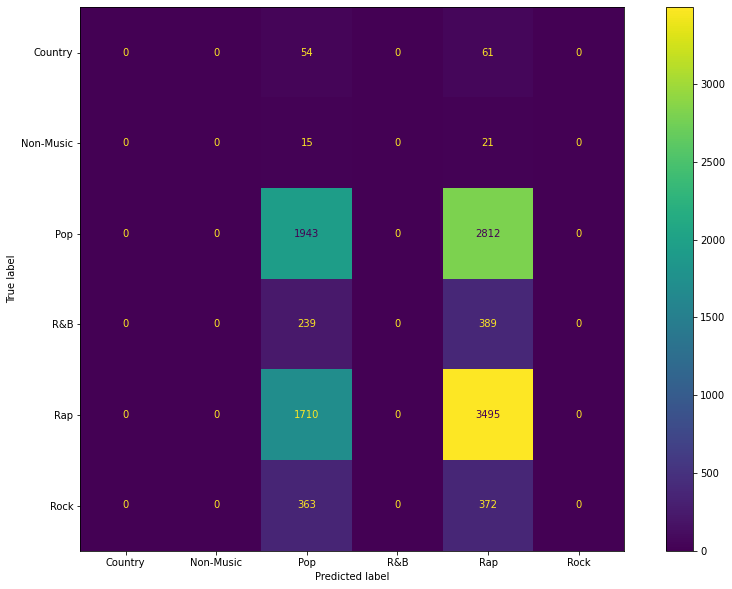

In [81]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, logistic_regression_prediction, labels=logistic_regression_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression_model.classes_)
disp.plot()
plt.rcParams["figure.figsize"] = (20,15)

In [83]:
print(f"Completed the fit in {round((toc-tic), 3)} seconds")
print(f"The fit has a \033[1m\033[93mtrain\033[0m set accuracy of {round(train_accuracy*100, 1)} %")
print(f"The fit has a \033[1m\033[92mtest\033[0m set accuracy of {round(test_accuracy*100, 1)} %")


Completed the fit in 0.453 seconds
The fit has a train set accuracy of 47.2 %
The fit has a test set accuracy of 47.4 %


## Applying dimensionality reduction (PCA)

#### Reducing to 5 dimensions.

In [84]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [85]:
pca = PCA(n_components=5)
new_columns = ['1', '2', '3', '4', '5']
components = pca.fit_transform(X)
df_5 = pd.DataFrame(data = components, columns = new_columns)
array_5 = df_5.values
finalDf_5 = pd.concat([df_5, data[['genre']]], axis = 1)

In [87]:
X_train_5, X_test_5, y_train_5, y_test_5 = model_selection.train_test_split(
    array_5, 
    y, 
    test_size = test_set_size, 
    random_state = seed
)

In [109]:
# Time the event.
tic = time.perf_counter()

logistic_regression_model_2 = LogisticRegression(max_iter=1000)
logistic_regression_model_2.fit(X_train_5, y_train_5)

toc = time.perf_counter()
print(f"Completed the fit in {toc - tic:0.6f} seconds")

Completed the fit in 0.889708 seconds


In [89]:
train_accuracy = logistic_regression_model_2.score(X_train_5, y_train_5)
train_accuracy

0.6309160638019699

In [90]:
test_accuracy = logistic_regression_model_2.score(X_test_5, y_test_5)
test_accuracy

0.6338678751960956

In [91]:
print(f"Completed the fit in {round((toc-tic), 6)} seconds")
print(f"The fit has a \033[1m\033[93mtrain\033[0m set accuracy of {round(train_accuracy*100, 1)} %")
print(f"The fit has a \033[1m\033[92mtest\033[0m set accuracy of {round(test_accuracy*100, 1)} %")

Completed the fit in 0.331439 seconds
The fit has a train set accuracy of 63.1 %
The fit has a test set accuracy of 63.4 %


#### Reducing to 2 dimensions.

In [102]:
pca = PCA(n_components=2)
new_columns = ['Principal Component 1', 'Principal Component 2']
components = pca.fit_transform(X)
df_2 = pd.DataFrame(data = components, columns = new_columns)
array_2 = df_2.values
finalDf_2 = pd.concat([df_2, data[['genre']]], axis = 1)

In [103]:
X_train_2, X_test_2, y_train_2, y_test_2 = model_selection.train_test_split(
    array_2, 
    y, 
    test_size = test_set_size, 
    random_state = seed
)

In [104]:
# Time the event.
tic = time.perf_counter()

logistic_regression_model_2 = LogisticRegression(max_iter=1000)
logistic_regression_model_2.fit(X_train_2, y_train_2)

toc = time.perf_counter()
print(f"Completed the fit in {toc - tic:0.6f} seconds")

Completed the fit in 0.733784 seconds


In [105]:
train_accuracy = logistic_regression_model_2.score(X_train_2, y_train_2)
train_accuracy

0.5955940033121241

In [106]:
test_accuracy = logistic_regression_model_2.score(X_test_2, y_test_2)
test_accuracy

0.6015339027366219

In [107]:
print(f"Completed the fit in {round((toc-tic)*1000, 6)} milliseconds")
print(f"The fit has a \033[1m\033[93mtrain\033[0m set accuracy of {round(train_accuracy*100, 1)} %")
print(f"The fit has a \033[1m\033[92mtest\033[0m set accuracy of {round(test_accuracy*100, 1)} %")

Completed the fit in 733.7836 milliseconds
The fit has a train set accuracy of 59.6 %
The fit has a test set accuracy of 60.2 %


### Visualize the new reduced dataset as a 2D diagram.


In [108]:
# Show distribution of genres.
data['genre'].value_counts()

Rap          25622
Pop          24031
Rock          3743
R&B           3238
Country        520
Non-Music      212
Name: genre, dtype: int64

In [99]:
finalDf_2 = pd.concat([df_2, data[['genre']]], axis = 1)

In [100]:
finalDf_2

,Principal Component 1,Principal Component 2,genre
0,-1.702160,-0.369919,Pop
1,2.339860,0.459611,Pop
2,2.415093,-2.275561,Rap
3,-0.974207,-1.392965,R&B
4,1.919426,0.216063,Pop
...,...,...,...
57367,NaN,NaN,Pop
57368,NaN,NaN,Pop
57369,NaN,NaN,Rock
57370,NaN,NaN,Rap


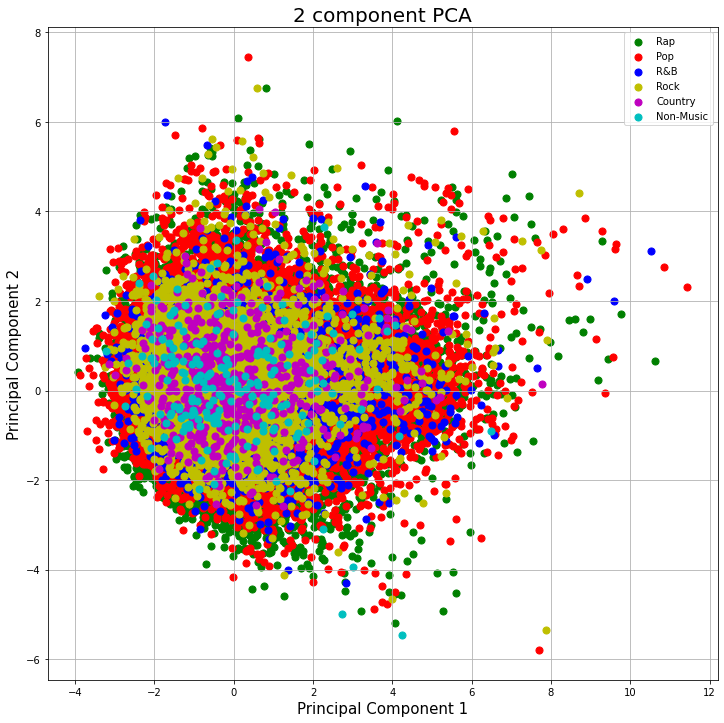

In [101]:
# Visualize the new reduced dataset as a 2D diagram.

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Rap', 'Pop', 'R&B', 'Rock', 'Country', 'Non-Music']
colors = ['g', 'r', 'b', 'y', 'm', 'c']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf_2['genre'] == target
    ax.scatter(finalDf_2.loc[indicesToKeep, 'Principal Component 1']
               , finalDf_2.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()